# Pulsar Star
## Combine shallow learning with deep learning

In [1]:
#load the necessary modules
import pandas as pd
import numpy as np
# from scipy.io import loadmat
# import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier


from keras.models import Model,Sequential
from keras.layers import Dense, Dropout,Flatten,MaxPooling1D,Input
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.utils.vis_utils import plot_model

import seaborn as sns
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [2]:
path = '../ten-datasets/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'pulsar_stars.csv')

In [3]:
print(df.shape)
df.head()

(17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.target_class.unique()

array([0, 1])

In [5]:
print(df.target_class.shape)

(17898,)


In [6]:
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify=y)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14318, 8)
(14318,)
(3580, 8)
(3580,)


In [8]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [9]:
X_train.shape

(14318, 8)

# Model 1 : Shallow feature with deep learning

>###  Use Logistic Regression to create new feature
>###  Merge shallow learning feature with dataset
>###  Use MLP to train new dataset

In [20]:
def extend_dim(X,y_predict):
    X_list = X.tolist()
    for i in range(len(X_list)):
        X_list[i].append(y_train_predict[i][0])
    return np.array(X_list)
    

####  Use Logistic Regression to create new feature

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
# nb=GaussianNB()
# nb.fit(X_train,y_train)

lr = LogisticRegression(C=10,max_iter = 100, tol=.1,solver='sag')
lr.fit(X_train, y_train)
y_train_predict = lr.predict_proba(X_train)
y_test_predict = lr.predict_proba(X_test)

# y_train_predict = lr.predict(X_train)
# y_test_predict = lr.predict(X_test)

In [23]:
y_train_predict

array([[0.98940772, 0.01059228],
       [0.93901743, 0.06098257],
       [0.97400125, 0.02599875],
       ...,
       [0.97778544, 0.02221456],
       [0.93725632, 0.06274368],
       [0.96847122, 0.03152878]])

In [24]:
new_X_train = extend_dim(X_train,y_train_predict)
new_X_test = extend_dim(X_test,y_test_predict)

### Use MLP to train new dataset


In [25]:
print(new_X_train.shape)
print(new_X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14318, 9)
(3580, 9)
(14318,)
(3580,)


In [26]:
ann_model = Sequential()

ann_model.add(Dense(
        units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = new_X_train.shape[1]))

ann_model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

ann_model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()



Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,473
Trainable params: 2,473
Non-trainable params: 0
_________________________________________________________________


In [27]:

hist = ann_model.fit(new_X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(new_X_test, y_test)
                    )

score = ann_model.evaluate(new_X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 14318 samples, validate on 3580 samples
Epoch 1/5
14318/14318 [==============================] - 1s 47us/step - loss: 0.3121 - accuracy: 0.9049 - val_loss: 0.1444 - val_accuracy: 0.9084
Epoch 2/5
14318/14318 [==============================] - 0s 29us/step - loss: 0.1223 - accuracy: 0.9084 - val_loss: 0.1219 - val_accuracy: 0.9084
Epoch 3/5
14318/14318 [==============================] - 0s 29us/step - loss: 0.1154 - accuracy: 0.9733 - val_loss: 0.1181 - val_accuracy: 0.9746
Epoch 4/5
14318/14318 [==============================] - 0s 31us/step - loss: 0.1118 - accuracy: 0.9777 - val_loss: 0.1143 - val_accuracy: 0.9771
Epoch 5/5
14318/14318 [==============================] - 0s 31us/step - loss: 0.1085 - accuracy: 0.9781 - val_loss: 0.1111 - val_accuracy: 0.9771
Test loss: 0.11111014270582678
Test accuracy: 0.9770949482917786


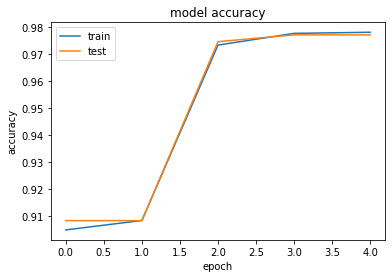

In [29]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

image_name = 'plusarStars_ann_accuracy.png'
plt.savefig(image_name)

plt.show()

## Model 2: Deep feature with shallow learning

>###  Use a middle layer as deep fature from MLP
>###  Use shallow learning to classify the deep feature

In [21]:


ann_model = Sequential()

ann_model.add(Dense(
        units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

ann_model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

ann_model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 2,469
Trainable params: 2,469
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = ann_model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 14318 samples, validate on 3580 samples
Epoch 1/5
14318/14318 [==============================] - 1s 52us/step - loss: 0.2745 - accuracy: 0.9511 - val_loss: 0.0829 - val_accuracy: 0.9763
Epoch 2/5
14318/14318 [==============================] - 0s 28us/step - loss: 0.0816 - accuracy: 0.9765 - val_loss: 0.0760 - val_accuracy: 0.9771
Epoch 3/5
14318/14318 [==============================] - 0s 30us/step - loss: 0.0767 - accuracy: 0.9775 - val_loss: 0.0737 - val_accuracy: 0.9782
Epoch 4/5
14318/14318 [==============================] - 0s 30us/step - loss: 0.0747 - accuracy: 0.9778 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 5/5
14318/14318 [==============================] - 0s 31us/step - loss: 0.0733 - accuracy: 0.9777 - val_loss: 0.0708 - val_accuracy: 0.9796


In [23]:
intermediate_layer_model = Model(inputs = ann_model.input, outputs = ann_model.layers[2].output)
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9_input (InputLayer)   (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_mid_layer_train = intermediate_layer_model.predict(X_train)
X_mid_layer_test = intermediate_layer_model.predict(X_test)
print(X_mid_layer_train.shape)
print(X_mid_layer_test.shape)

(14318, 32)
(3580, 32)


### Random Forest to train deep features

In [28]:
forest = RandomForestClassifier(criterion='gini', n_estimators = 100, random_state =123)
forest.fit(X_mid_layer_train,y_train)

y_train_predict = forest.predict(X_mid_layer_train)
print ("forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_test_predict = forest.predict(X_mid_layer_test)
print ("forest test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))


forest Train Accuracy: 1.000
forest test Accuracy: 0.975


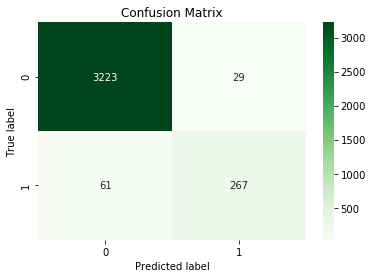

In [29]:
matrix = confusion_matrix(y_test, y_test_predict)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
labels = np.unique(y_test)
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.ylabel('True label')
plt.yticks(np.arange(len(labels))+0.5,labels)
plt.show()

### Logistic Regression to train deep features

In [30]:

lr = LogisticRegression(C=10,max_iter = 100, tol=.1,solver='sag')
lr.fit(X_mid_layer_train,y_train)

y_train_predict = lr.predict(X_mid_layer_train)
print ("lr Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_test_predict = lr.predict(X_mid_layer_test)
print ("lr test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))


lr Train Accuracy: 0.979
lr test Accuracy: 0.980


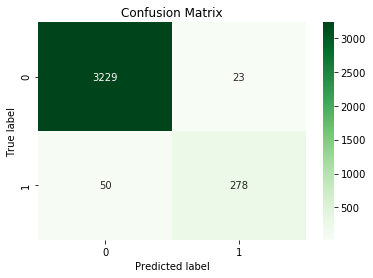

In [31]:
matrix = confusion_matrix(y_test, y_test_predict)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
labels = np.unique(y_test)
plt.xticks(np.arange(len(labels))+0.5,labels)
plt.ylabel('True label')
plt.yticks(np.arange(len(labels))+0.5,labels)
plt.show()

# Compare with the best accuracy model form project01

## MLP

In [ ]:
ann_model = Sequential()

ann_model.add(Dense(
        units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

ann_model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

ann_model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()



In [ ]:

hist = ann_model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

score = ann_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

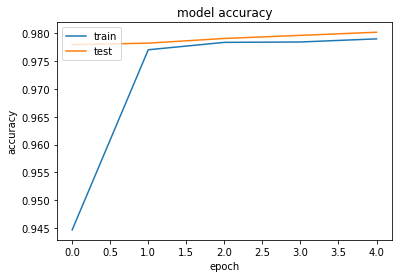

In [48]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()